# CSC3831 Final Assessment - Part I: Data Engineering



In [18]:
# Loading in standard packages for analysis, feel free to add an extra packages you'd like to use here
import random
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Loading in the corrupted dataset to be used in analysis and imputation
houses_corrupted_df = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.1_MAR.csv', header=0)
# Remove an artifact from the dataset
houses_corrupted_df.drop(["Unnamed: 0"], axis=1, inplace=True)
houses_corrupted_df.head(150)

median_house_value  median_income  housing_median_age  total_rooms  \
0              452600.0         8.3252                41.0        880.0   
1              358500.0         8.3014                21.0       7099.0   
2              352100.0         7.2574                52.0       1467.0   
3              341300.0         5.6431                52.0       1274.0   
4              342200.0         3.8462                52.0       1627.0   
..                  ...            ...                 ...          ...   
145            296400.0         5.2402                52.0       1389.0   
146            273700.0         6.5217                52.0       1971.0   
147            227700.0         3.2632                52.0       2183.0   
148            199600.0         3.0298                52.0       2286.0   
149            239800.0         4.5428                52.0       2721.0   

     total_bedrooms  population  households  latitude  longitude  
0             129.0       322.0       126.0     37.88    -122.23  
1            1106.0      2401.0      1138.0     37.86    -122.22  
2             190.0         NaN       177.0     37.85    -122.24  
3             235.0         NaN       219.0     37.85    -122.25  
4             280.0       565.0       259.0     37.85    -122.25  
..              ...         ...         ...       ...        ...  
145           212.0         NaN       224.0     37.81    -122.21  
146           335.0       765.0       308.0     37.81    -122.22  
147           465.0      1129.0       460.0     37.80    -122.22  
148           464.0      1073.0       441.0     37.80    -122.22  
149           541.0      1185.0       515.0     37.80    -122.22  

[150 rows x 9 columns]

In [19]:
houses_corrupted_df.to_csv("houses_cor_df.csv", index=False)

Above we've loaded in a corrupted version of a housing dataset. The anomalies need to be dealt with and missing values imputed.

### 1. Data Understanding [7]
- Perform ad hoc EDA to understand and describe what you see in the raw dataset
  - Include graphs, statistics, and written descritpions as appropriate
  - Any extra information about the data you can provide here is useful, think about performing an analysis (ED**A**), what would you find interesting or useful?
- Identify features with missing records, outlier records


In [20]:
#Basic info
print("Dataset information")
houses_corrupted_df.info()
print ('Dataset Stats')
houses_corrupted_df.describe()


Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
 1   median_income       18576 non-null  float64
 2   housing_median_age  18576 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          18576 non-null  float64
 6   households          20640 non-null  float64
 7   latitude            20640 non-null  float64
 8   longitude           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
Dataset Stats


median_house_value  median_income  housing_median_age   total_rooms  \
count        20640.000000   18576.000000        18576.000000  20640.000000   
mean        206855.816909       3.929958           28.324182   2635.763081   
std         115395.615874       1.964296           12.584914   2181.615252   
min          14999.000000       0.499900            1.000000      2.000000   
25%         119600.000000       2.560300           18.000000   1447.750000   
50%         179700.000000       3.572400           28.000000   2127.000000   
75%         264725.000000       4.870050           37.000000   3148.000000   
max         500001.000000      15.000100           52.000000  39320.000000   

       total_bedrooms    population    households      latitude     longitude  
count    20640.000000  18576.000000  20640.000000  20640.000000  20640.000000  
mean       537.898014   1488.069283    499.539680     35.631861   -119.569704  
std        421.247906   1170.585810    382.329753      2.135952      2.003532  
min          1.000000      3.000000      1.000000     32.540000   -124.350000  
25%        295.000000    839.000000    280.000000     33.930000   -121.800000  
50%        435.000000   1227.000000    409.000000     34.260000   -118.490000  
75%        647.000000   1803.000000    605.000000     37.710000   -118.010000  
max       6445.000000  35682.000000   6082.000000     41.950000   -114.310000

<function matplotlib.pyplot.show(close=None, block=None)>

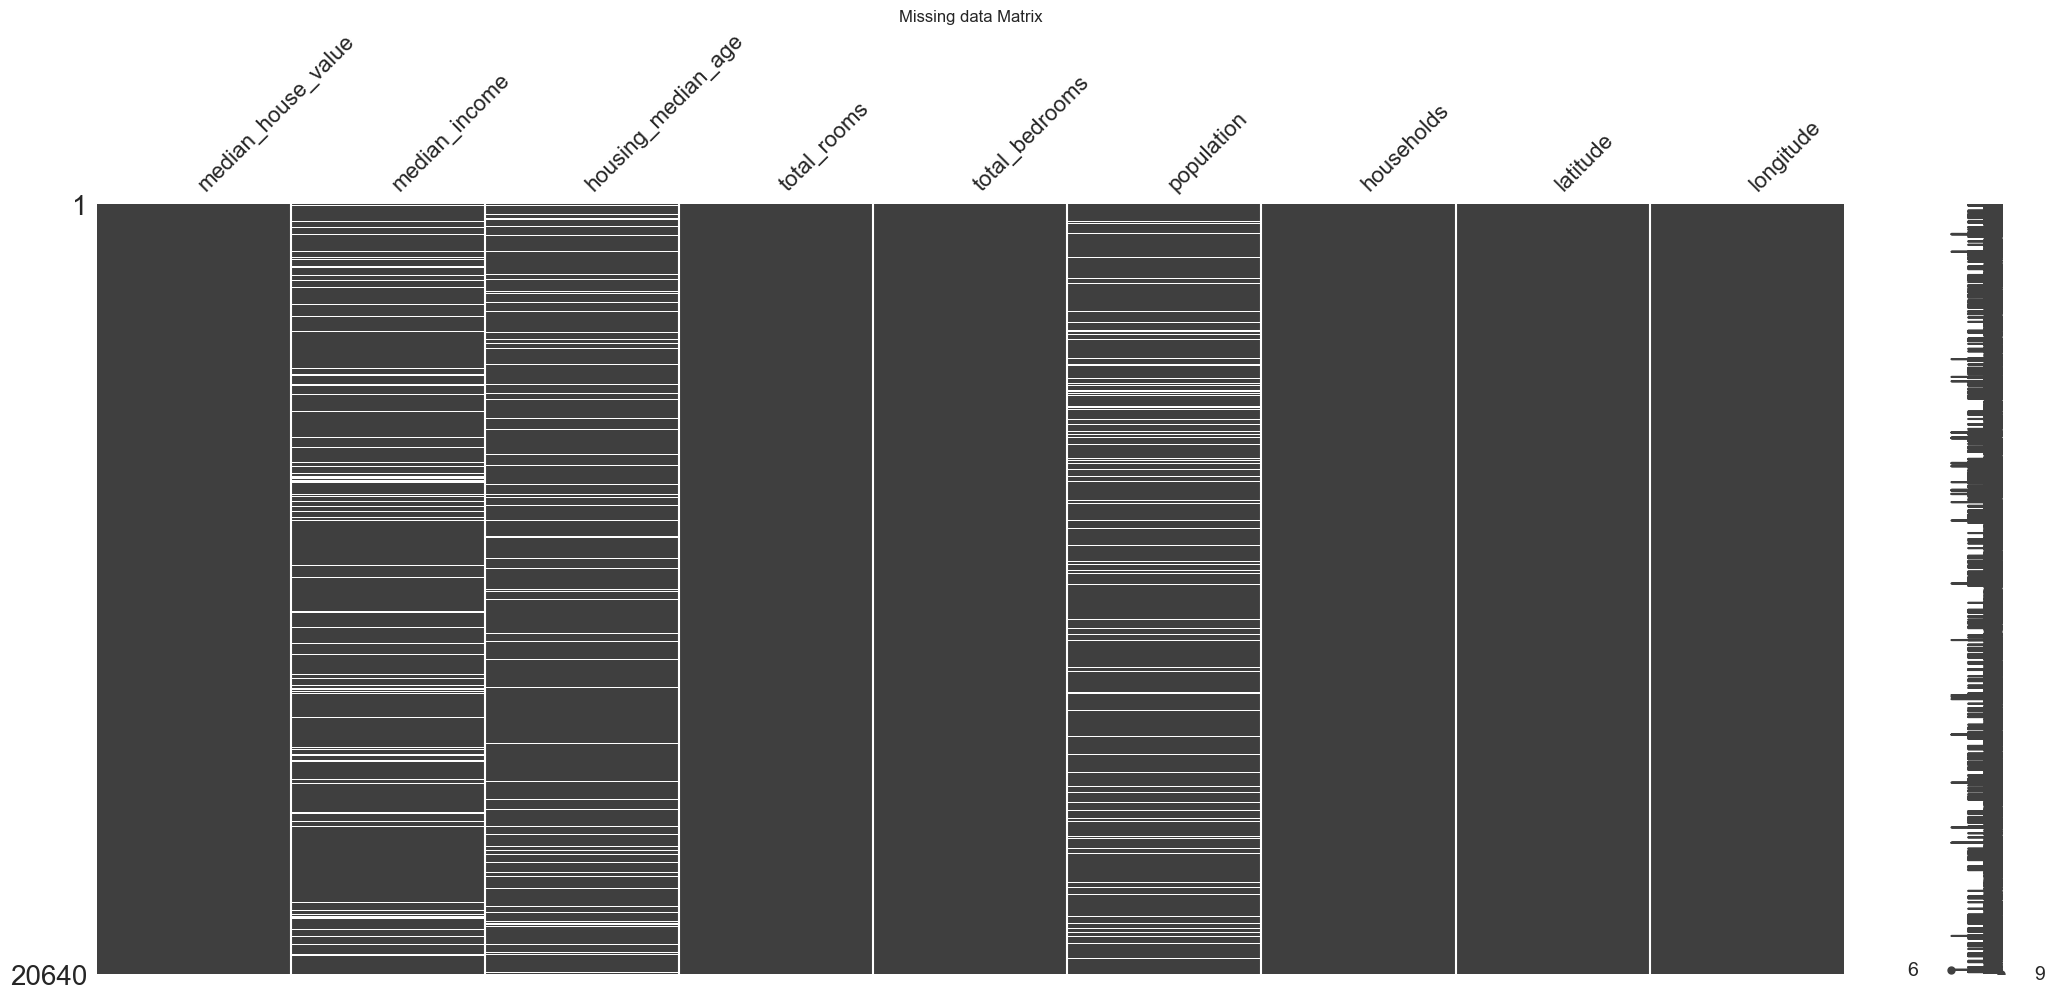

In [21]:
#missing data
msno.matrix(houses_corrupted_df)
plt.title('Missing data Matrix')
plt.show


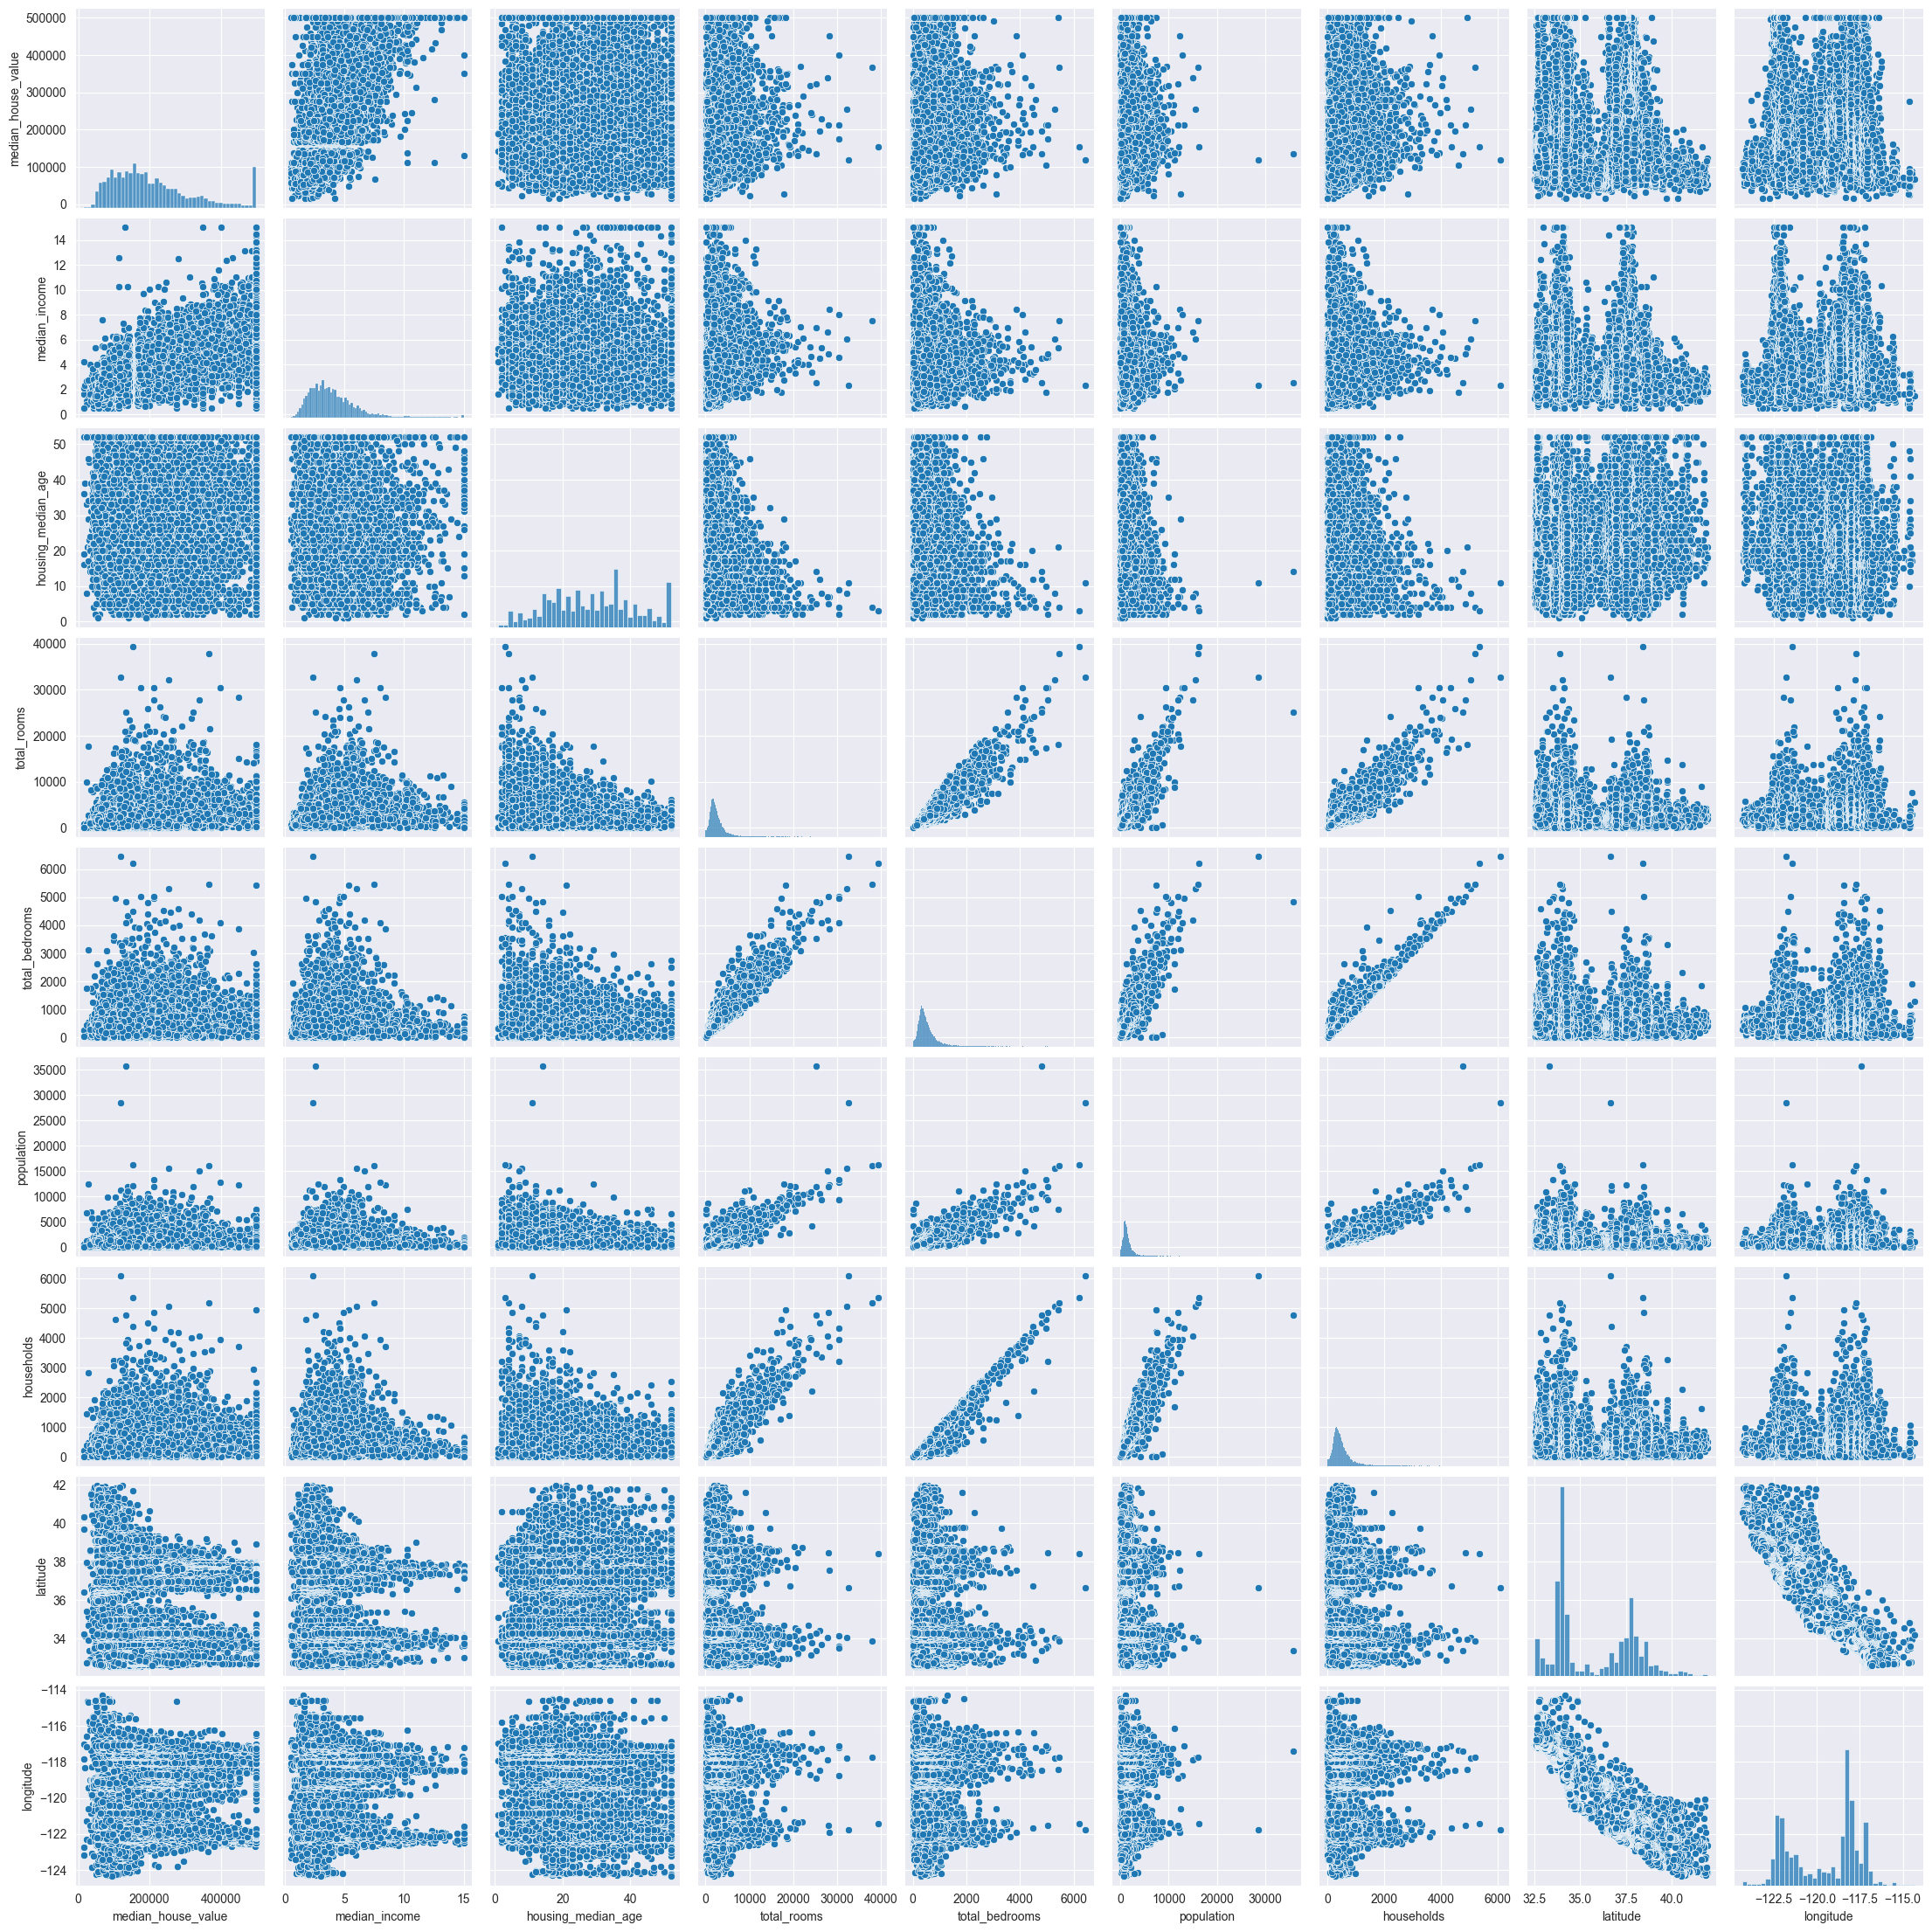

In [22]:
#Analysing Skew
sns.pairplot(houses_corrupted_df)

<Axes: xlabel='median_house_value', ylabel='Density'>

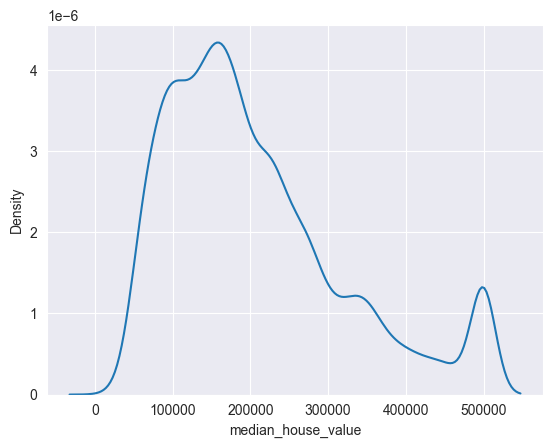

In [23]:
#Evaluating skew density of all attributes
sns.kdeplot(houses_corrupted_df['median_house_value'])

<Axes: xlabel='median_income', ylabel='Density'>

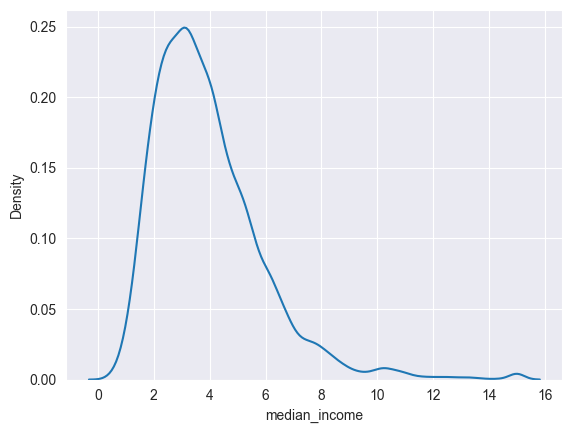

In [24]:
sns.kdeplot(houses_corrupted_df['median_income'])

<Axes: xlabel='housing_median_age', ylabel='Density'>

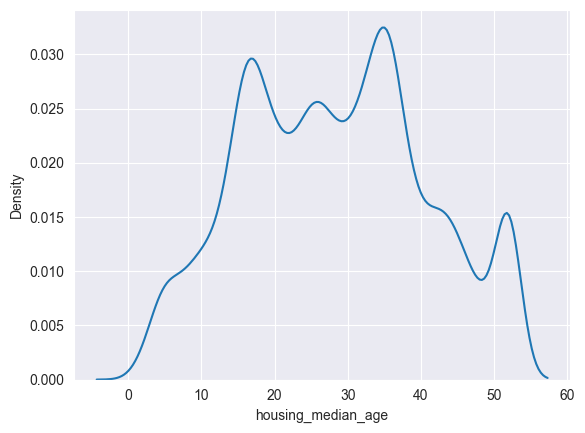

In [25]:
sns.kdeplot(houses_corrupted_df['housing_median_age'])

<Axes: xlabel='total_rooms', ylabel='Density'>

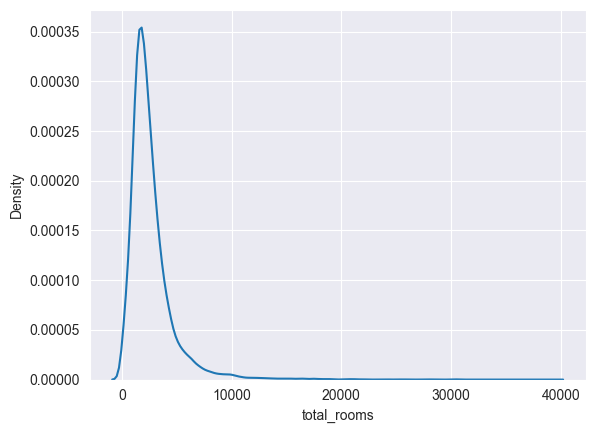

In [26]:
sns.kdeplot(houses_corrupted_df['total_rooms'])

<Axes: xlabel='total_bedrooms', ylabel='Density'>

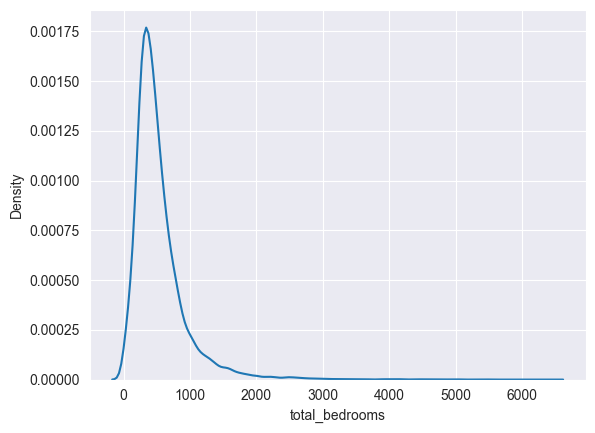

In [27]:
sns.kdeplot(houses_corrupted_df['total_bedrooms'])

<Axes: xlabel='population', ylabel='Density'>

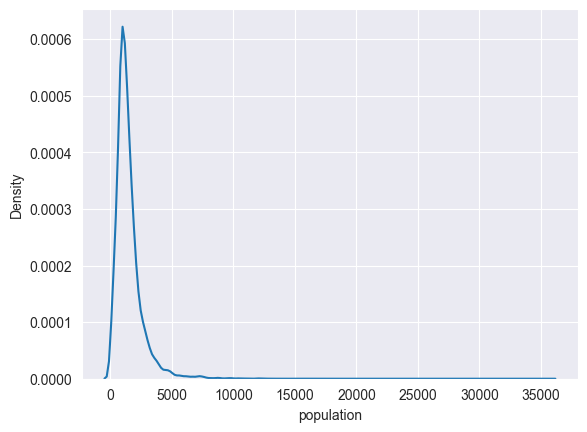

In [28]:
sns.kdeplot(houses_corrupted_df['population'])

<Axes: xlabel='latitude', ylabel='Density'>

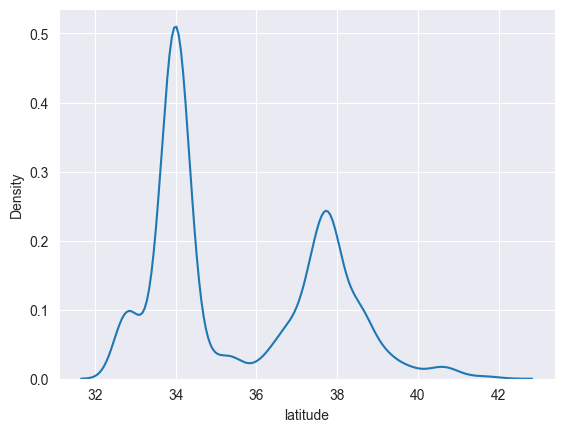

In [29]:
sns.kdeplot(houses_corrupted_df['latitude'])

<Axes: xlabel='longitude', ylabel='Density'>

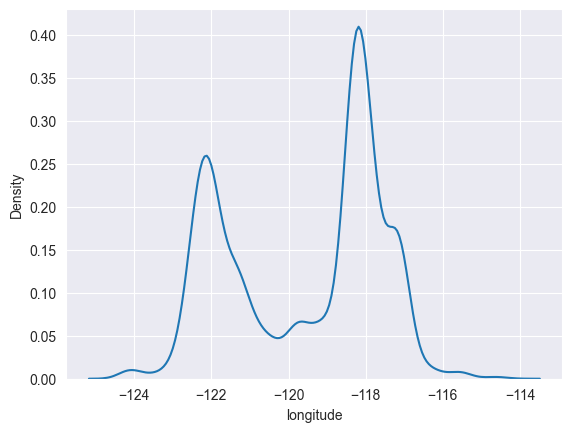

In [30]:
sns.kdeplot(houses_corrupted_df['longitude'])

In [31]:
#Finding out correlation between attributes
houses_corrupted_df.corr()

median_house_value  median_income  housing_median_age  \
median_house_value            1.000000       0.694887            0.097929   
median_income                 0.694887       1.000000           -0.120147   
housing_median_age            0.097929      -0.120147            1.000000   
total_rooms                   0.134153       0.198818           -0.372323   
total_bedrooms                0.050594      -0.009499           -0.329757   
population                   -0.027855       0.006298           -0.305052   
households                    0.065843       0.012754           -0.312948   
latitude                     -0.144160      -0.096861            0.011372   
longitude                    -0.045967      -0.008902           -0.106438   

                    total_rooms  total_bedrooms  population  households  \
median_house_value     0.134153        0.050594   -0.027855    0.065843   
median_income          0.198818       -0.009499    0.006298    0.012754   
housing_median_age    -0.372323       -0.329757   -0.305052   -0.312948   
total_rooms            1.000000        0.929893    0.857515    0.918484   
total_bedrooms         0.929893        1.000000    0.877178    0.979829   
population             0.857515        0.877178    1.000000    0.907096   
households             0.918484        0.979829    0.907096    1.000000   
latitude              -0.036100       -0.066318   -0.107525   -0.071035   
longitude              0.044568        0.068378    0.099797    0.055310   

                    latitude  longitude  
median_house_value -0.144160  -0.045967  
median_income      -0.096861  -0.008902  
housing_median_age  0.011372  -0.106438  
total_rooms        -0.036100   0.044568  
total_bedrooms     -0.066318   0.068378  
population         -0.107525   0.099797  
households         -0.071035   0.055310  
latitude            1.000000  -0.924664  
longitude          -0.924664   1.000000

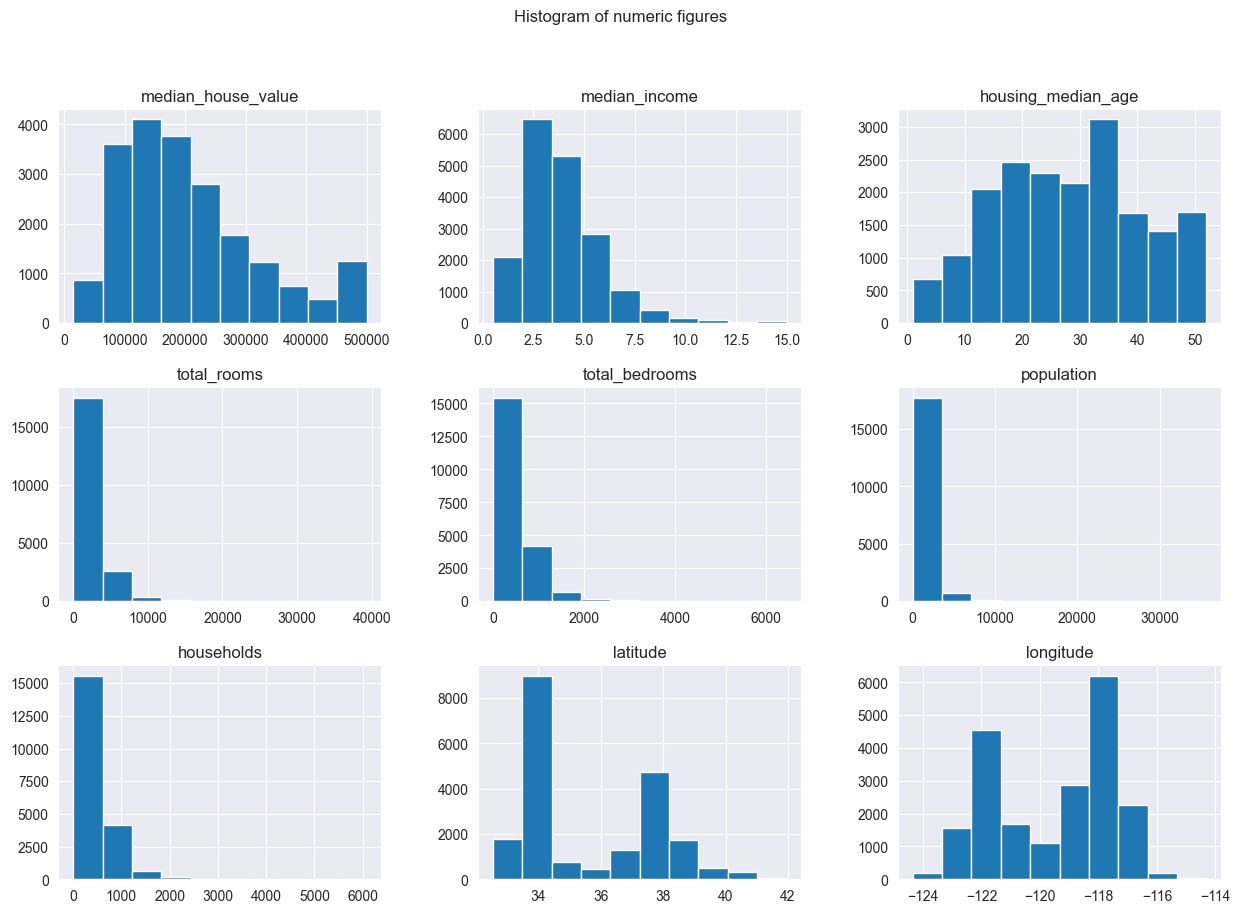

In [32]:
#Distribution of numeric figures
houses_corrupted_df.hist(figsize=(15,10))
plt.suptitle("Histogram of numeric figures")
plt.show()


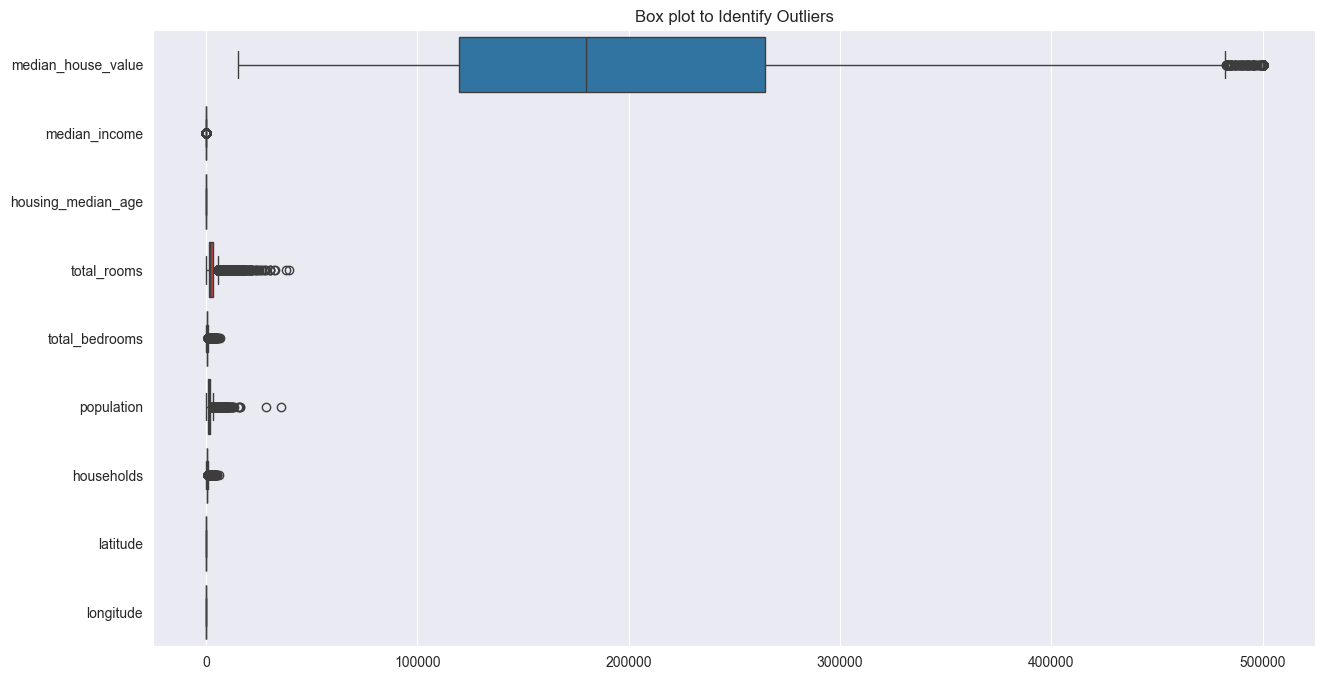

In [33]:
# Box plots to Identify Outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=houses_corrupted_df, orient='h')
plt.title("Box plot to Identify Outliers")
plt.show()

In [34]:
#Dropping Nan Values
houses_cleaned_df = houses_corrupted_df.dropna()
houses_cleaned_df.head(50)

median_house_value  median_income  housing_median_age  total_rooms  \
0             452600.0         8.3252                41.0        880.0   
1             358500.0         8.3014                21.0       7099.0   
4             342200.0         3.8462                52.0       1627.0   
5             269700.0         4.0368                52.0        919.0   
6             299200.0         3.6591                52.0       2535.0   
7             241400.0         3.1200                52.0       3104.0   
8             226700.0         2.0804                42.0       2555.0   
9             261100.0         3.6912                52.0       3549.0   
11            241800.0         3.2705                52.0       3503.0   
12            213500.0         3.0750                52.0       2491.0   
13            191300.0         2.6736                52.0        696.0   
15            140000.0         2.1250                50.0       1120.0   
23             99700.0         2.1806                52.0       1688.0   
25            107500.0         2.4038                41.0        535.0   
26             93800.0         2.4597                49.0       1130.0   
27            105500.0         1.8080                52.0       1898.0   
28            108900.0         1.6424                50.0       2082.0   
29            132000.0         1.6875                52.0        729.0   
30            122300.0         1.9274                49.0       1916.0   
31            115200.0         1.9615                52.0       2153.0   
33            104900.0         1.3750                49.0       1655.0   
34            109700.0         2.7303                51.0       2665.0   
39            176000.0         2.5898                52.0       2432.0   
42            118800.0         1.0250                49.0        713.0   
43            188800.0         3.9643                52.0        950.0   
45            182300.0         2.6768                52.0       1656.0   
46            142500.0         2.0260                50.0       1125.0   
47            137500.0         1.7348                43.0       1007.0   
48            187500.0         0.9506                40.0        624.0   
49            112500.0         1.7750                40.0        946.0   
50            171900.0         0.9218                21.0        896.0   
51             93800.0         1.5045                43.0       1868.0   
52             97500.0         1.1108                41.0       3221.0   
53            104200.0         1.2475                52.0       1630.0   
54             87500.0         1.6098                52.0       1170.0   
55             83100.0         1.4113                52.0        945.0   
57             85300.0         0.8172                52.0       1489.0   
59             60000.0         2.5625                 2.0        158.0   
60             75700.0         3.3929                52.0       1121.0   
61             75000.0         6.1183                49.0        135.0   
62             86100.0         0.9011                50.0        760.0   
64             73500.0         2.5938                48.0        828.0   
65             78400.0         1.1667                52.0       1010.0   
67             81300.0         2.6094                52.0       1027.0   
68             85000.0         1.8516                52.0        572.0   
69            129200.0         0.9802                46.0       2801.0   
70             82500.0         1.7719                26.0        768.0   
71             95200.0         0.7286                46.0        935.0   
72             75000.0         1.7500                49.0        844.0   
73             67500.0         0.4999                46.0         12.0   

    total_bedrooms  population  households  latitude  longitude  
0            129.0       322.0       126.0     37.88    -122.23  
1           1106.0      2401.0      1138.0     37.86    -122.22  
4            280.0       565.0 

### 2. Outlier Identification [10]
- Utilise a statistical outlier detection approach (i.e., **no** KNN, LOF, 1Class SVM)
- Utilise an algorithmic outlier detection method of your choice
- Compare results and decide what to do with identified outleirs
  - Include graphs, statistics, and written descriptions as appropriate
- Explain what you are doing, and why your analysis is appropriate
- Comment on benefits/detriments of statistical and algorithmic outlier detection approaches


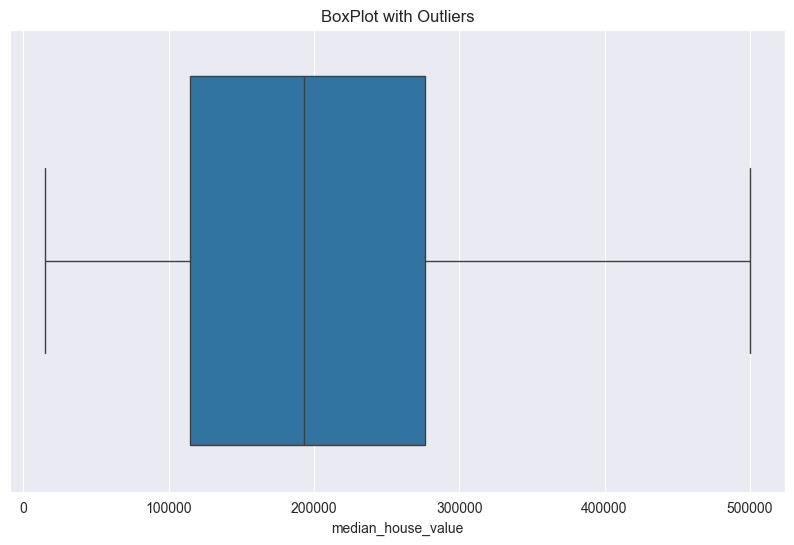

In [35]:
# Using IQR for statistical Outlier Detection
def detect_outliers_iqr(data):
    outliers = {}
    for column in data.select_dtypes(include=np.number).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1-1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
        return outliers

iqr_outliers = detect_outliers_iqr(houses_cleaned_df)

#Visualize IQR Outliers
plt.figure(figsize=(10,6))
for col, outlier_data in iqr_outliers.items():
    sns.boxplot(data=houses_cleaned_df, x=col)
    plt.title(f"BoxPlot with Outliers")
    plt.show()



C:\Users\Hp\AppData\Local\Temp\ipykernel_5128\1105721747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses_cleaned_df.loc[:,'Isolation_Outlier'] = isolation_outliers


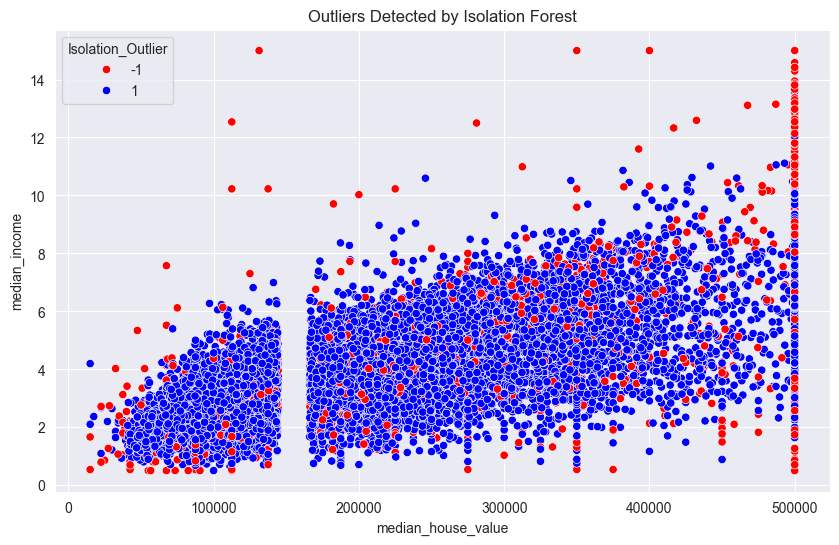

In [36]:
# Algorithmic Outlier Detection using Isolation Forest
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_outliers = isolation_forest.fit_predict(houses_cleaned_df.select_dtypes(include=np.number))
#Assigning outliers to a new column using .loc to avoid warning
houses_cleaned_df.loc[:,'Isolation_Outlier'] = isolation_outliers

# Visualizing Algorithmic Outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=houses_cleaned_df, x=houses_cleaned_df.select_dtypes(include=np.number).columns[0],
                y=houses_cleaned_df.select_dtypes(include=np.number).columns[1],
                hue='Isolation_Outlier', palette={1: 'blue', -1: 'red'})
plt.title("Outliers Detected by Isolation Forest")
plt.show()


### 3. Imputation [10]
- Identify which features should be imputed and which should be removed
  - Provide a written rationale for this decision
- Impute the missing records using KNN imputation
- Impute the missing records using MICE imputation
- Compare both imputed datasets feature distributions against each other and the non-imputed data
- Build a regressor on all thre datasets
  - Use regression models to predict house median price
  - Compare regressors of non-imputed data against imputed datas
  - **Note**: If you're struggling to compare against the original dataset focus on comparing the two imputed datasets against each other


Columns to Impute: ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
Columns to Remove: []


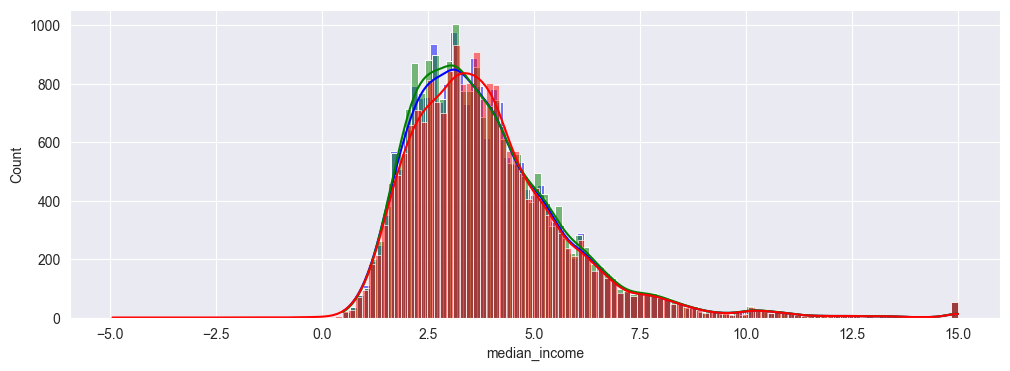

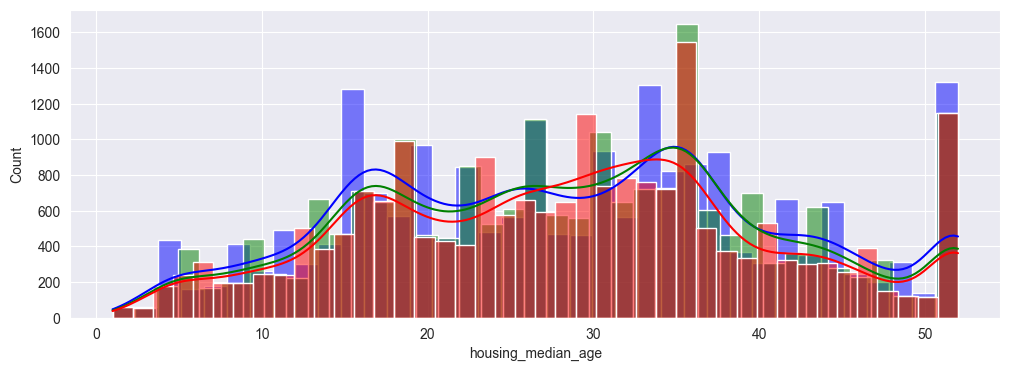

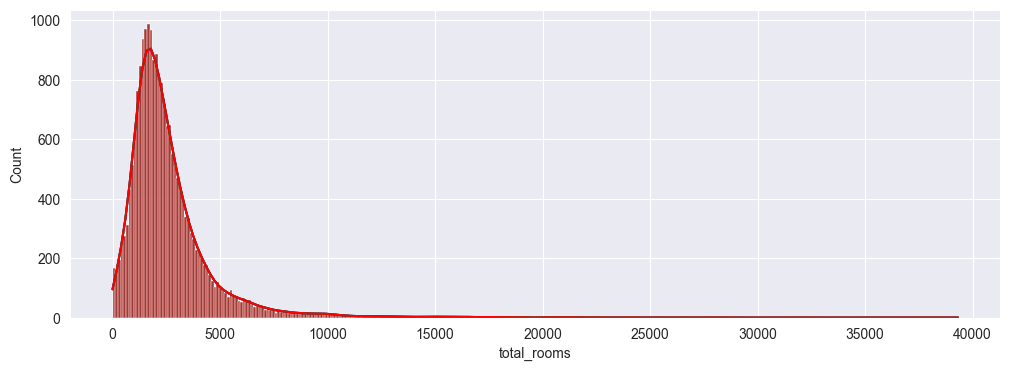

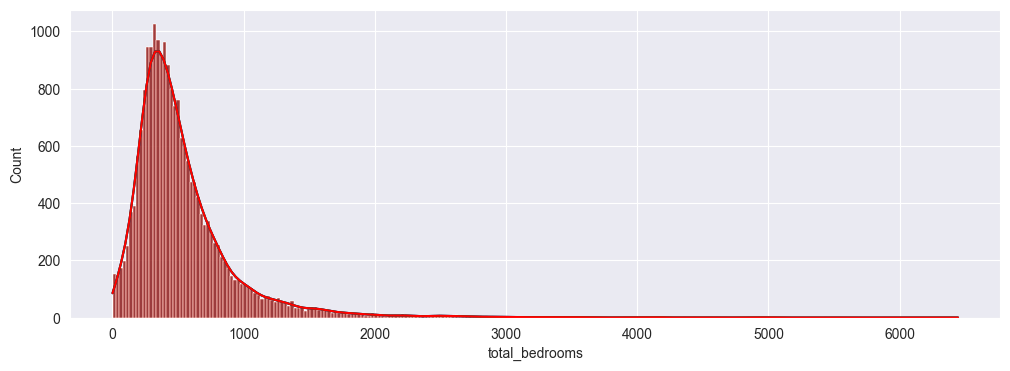

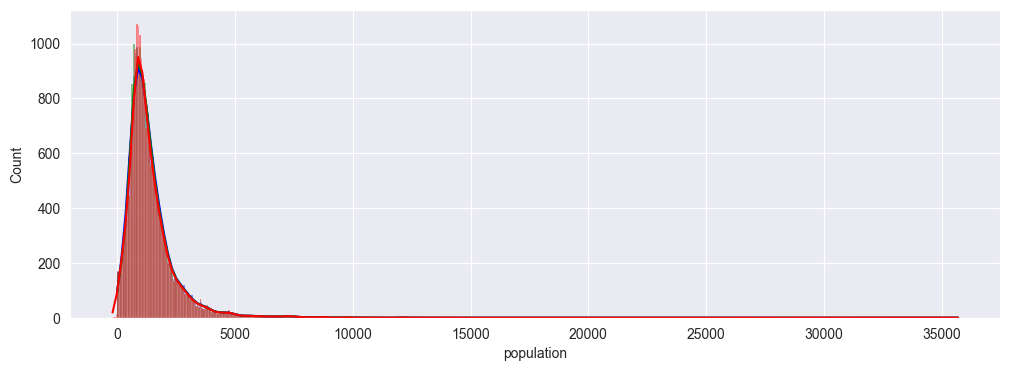

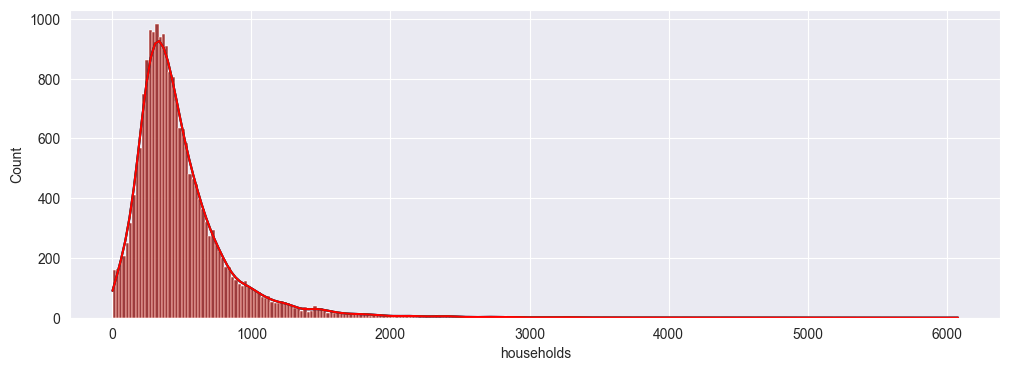

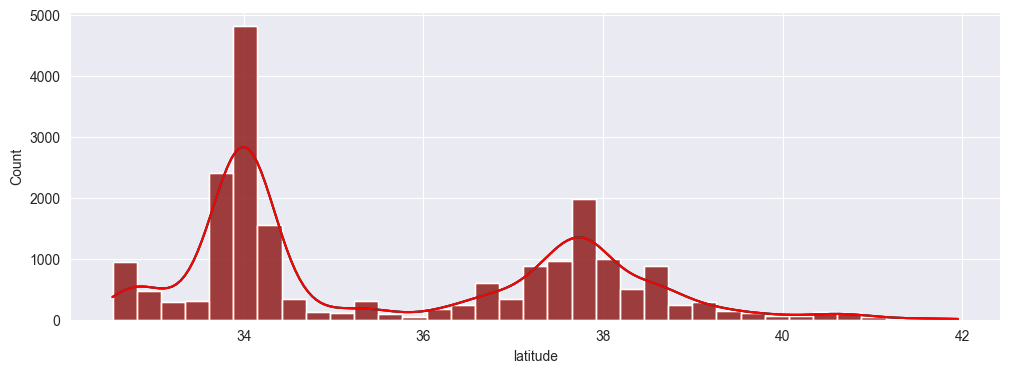

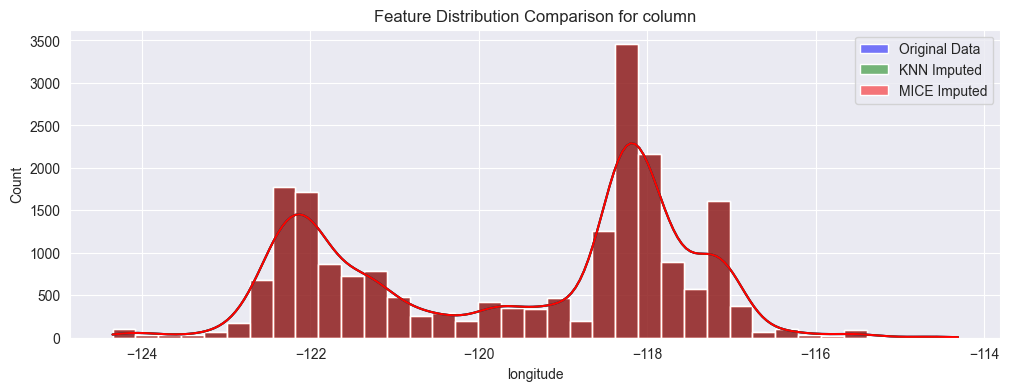

In [20]:
# Use this dataset for comparison against the imputed datasets
original_houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

#houses_corrupted_df.drop(["Unnamed:0"], axis=1, inplace=True)

#Determining features to impute or remove in corrupted dataset.
missing_data = houses_corrupted_df.isnull().mean()
impute_columns = missing_data[missing_data < 0.3].index.tolist()  # Impute if less than 30% missing
remove_columns = missing_data[missing_data >= 0.3].index.tolist()

print('Columns to Impute:', impute_columns)
print('Columns to Remove:', remove_columns)

#Drop columns with excessive missing values
houses_corrupted_df.drop(columns=remove_columns, inplace=True)
#Seperate Target Variables
target = 'median_house_value'
X_non_imputed = houses_corrupted_df.drop(columns=[target])
y= houses_corrupted_df[target].dropna()

# Performing KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
X_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(X_non_imputed), columns=X_non_imputed.columns)

# Performing MICE Imputation
mice_imputer = IterativeImputer(random_state=42)
X_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(X_non_imputed), columns=X_non_imputed.columns)

#Evaluatiing a distribution comparison with Original Datatset

for column in X_non_imputed.columns:
    plt.figure(figsize=(12,4))
    sns.histplot(original_houses[column], color='blue', label='Original Data', kde=True)
    sns.histplot(X_knn_imputed[column], color='green', label="KNN Imputed", kde=True)
    sns.histplot(X_mice_imputed[column], color='red', label="MICE Imputed", kde=True)
plt.title(f"Feature Distribution Comparison for column")
plt.legend()
plt.show()


### 4. Conclusions & Throughts [3]
- Disucss methods used for anomaly detection, pros/cons of each method
- Disucss challenges/difficulties in anomaly detection implementation
- Discuss methods used for imputation, pros/cons of each method
- Discuss challenges/difficulties in imputation implementation

In [21]:
#Compare both outliers
# Write summary
# Proceed to CPS work
# Proceed to machine leanring part of this data